In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [33]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))
print(crypto_df.size)
print(crypto_df.shape)
crypto_df.head()

8764
(1252, 7)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [34]:
# Drop all unwanted cryptos
edited_crypto_df = crypto_df[(crypto_df['IsTrading'] == True) & (crypto_df['TotalCoinsMined'] > 0)]
print(edited_crypto_df.size)
print(edited_crypto_df.shape)
edited_crypto_df.head()

3724
(532, 7)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [35]:
# Drop IsTrading column from the dataframe
edited_crypto_df = edited_crypto_df.drop('IsTrading', axis = 1)

# Drop rows that have at least one null value
edited_crypto_df = edited_crypto_df.dropna()

print(edited_crypto_df.size)
print(edited_crypto_df.shape)
edited_crypto_df.head()

3192
(532, 6)


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [36]:
# Drop CoinName and make TotalCoinSupply numeric
edited_crypto_df = edited_crypto_df.drop(['CoinName'], axis = 1)
edited_crypto_df["TotalCoinSupply"] = pd.to_numeric(edited_crypto_df["TotalCoinSupply"])
edited_crypto_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
8,ETH,Ethash,PoW,1.076842e+08,0.000000e+00


In [37]:
crypto_dummies = pd.get_dummies(edited_crypto_df)
print(crypto_dummies.shape)

(532, 630)


How did they change? 
Number of features increased from 4 to 98

In [18]:
# Scale the dataset
scaler = StandardScaler().fit(crypto_dummies)
crypto_scaled = scaler.transform(crypto_dummies)

In [38]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)
print(crypto_pca.shape)

(532, 74)


How did the number of the features change? Number of features decreased from 98 to 74

In [20]:
tsne = TSNE(learning_rate = 35)

In [39]:
crypto_tsne = tsne.fit_transform(crypto_pca)
print(crypto_tsne.shape)

(532, 2)


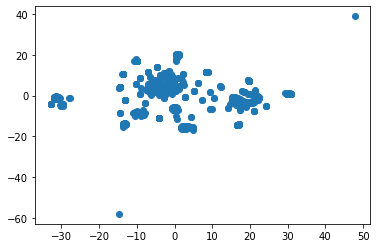

In [40]:
x_values = crypto_tsne[:,0]
y_values = crypto_tsne[:,1]
plt.scatter(x_values, y_values)

We have 3 distinct clusters

In [42]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_tsne)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

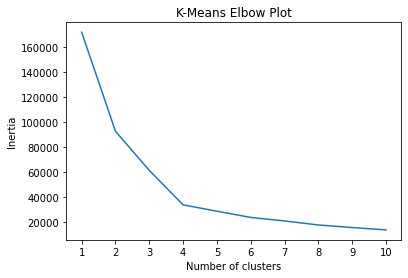

In [43]:
# Create an elbow plot to identify the best number of clusters

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.title("K-Means Elbow Plot")
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow of the plot appears at 4 clusters

Recommendation: The cryptos can be clustered together into 4 clusters based on the K-mean Elbow plot and into 3 clusters based on t-SNE scatter plot